
Processing flights_small.txt...

Processing flights_medium.txt...

Processing flights_large.txt...

=== Results Summary ===
flights_small.txt:
  Components: 1
  DFS Time: 0.0346s
  BFS Time: 0.0314s
flights_medium.txt:
  Components: 1
  DFS Time: 0.0683s
  BFS Time: 0.0643s
flights_large.txt:
  Components: 1
  DFS Time: 0.2826s
  BFS Time: 0.2648s


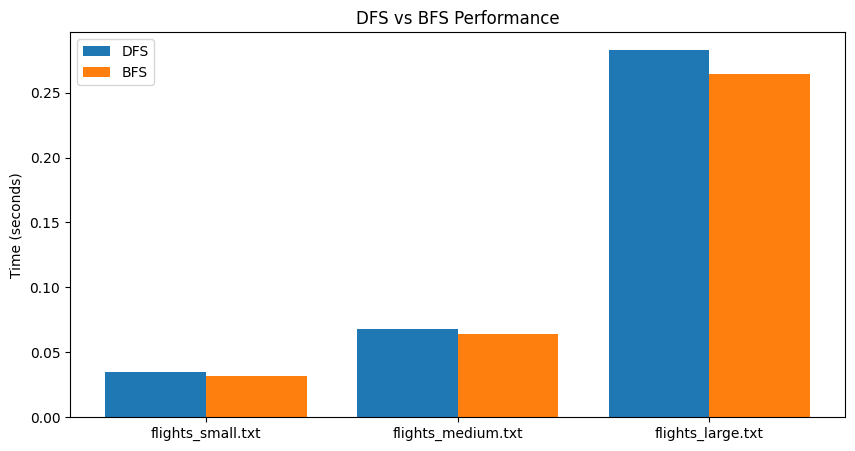

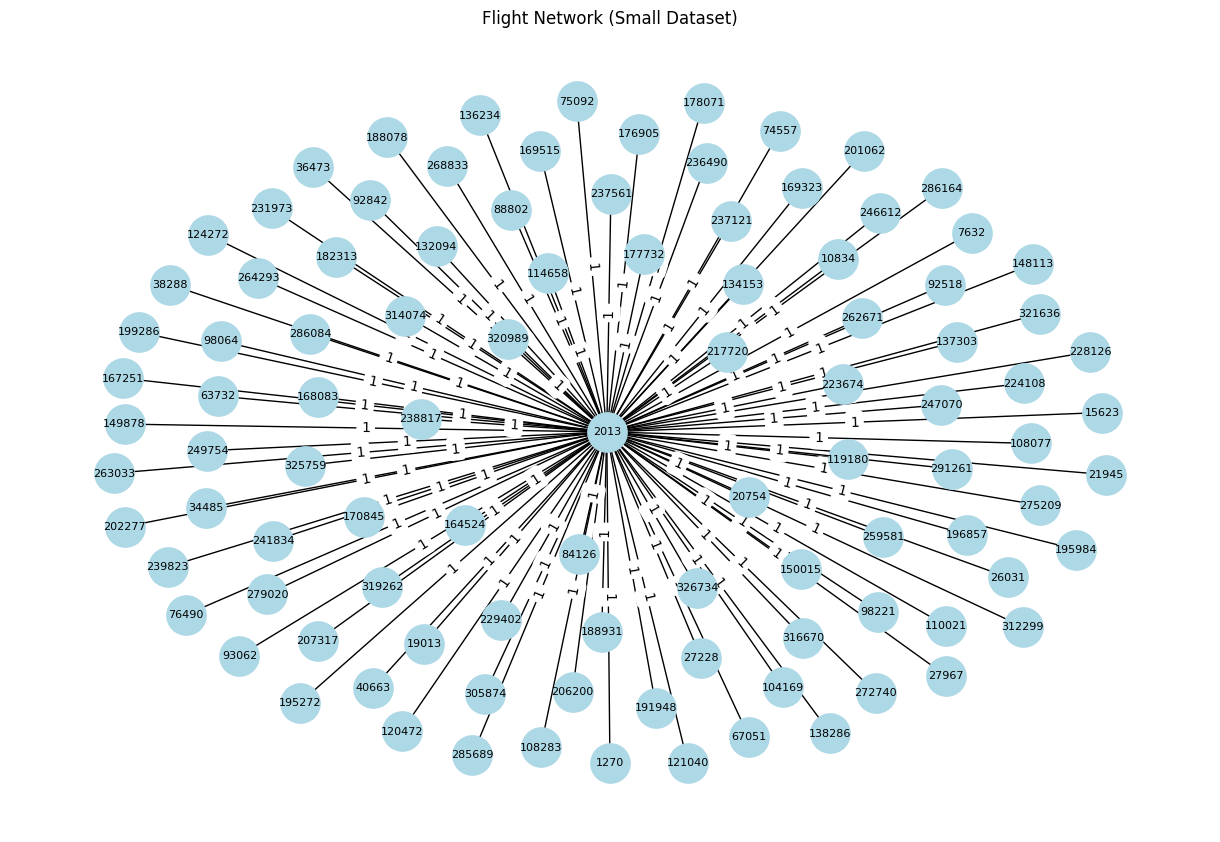

In [2]:
# Task 3: Connected Components Analysis (Optimized)

# Step 1: Load Flight Data (Without Pandas)
import csv
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import time

def read_flight_data(filename):
    """Returns (all_nodes, edges) including isolated airports"""
    nodes = set()
    edges = []
    with open(filename, newline='') as f:
        reader = csv.reader(f, delimiter='\t')
        next(reader)  # Skip header
        for row in reader:
            if len(row) >= 2 and row[0].strip() and row[1].strip():
                origin, dest = row[0].strip(), row[1].strip()
                nodes.add(origin)
                nodes.add(dest)
                edges.append((origin, dest))
    return nodes, edges

# Step 2: DFS/BFS Implementations (Optimized)
def dfs(start, visited, graph):
    stack = [start]
    component = []
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            component.append(node)
            # Iterate neighbors directly (faster than set operations)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    stack.append(neighbor)
    return component

def bfs(start, visited, graph):
    queue = deque([start])
    component = []
    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            component.append(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append(neighbor)
    return component

def connected_components(graph, method='dfs'):
    visited = set()
    components = []
    for node in graph:
        if node not in visited:
            comp = dfs(node, visited, graph) if method == 'dfs' else bfs(node, visited, graph)
            components.append(comp)
    return components

# Step 3: Process All Datasets
datasets = ['flights_small.txt', 'flights_medium.txt', 'flights_large.txt']
results = []

for dataset in datasets:
    print(f"\nProcessing {dataset}...")
    nodes, edges = read_flight_data(dataset)
    
    # Build graph with all nodes
    graph = defaultdict(set)
    for node in nodes:  # Ensure isolated nodes are included
        graph[node]
    for origin, dest in edges:
        graph[origin].add(dest)
        graph[dest].add(origin)
    
    # Time measurements
    start = time.time()
    cc_dfs = connected_components(graph, 'dfs')
    dfs_time = time.time() - start
    
    start = time.time()
    cc_bfs = connected_components(graph, 'bfs')
    bfs_time = time.time() - start
    
    results.append({
        'dataset': dataset,
        'dfs_time': dfs_time,
        'bfs_time': bfs_time,
        'components': len(cc_dfs)  # Same for BFS
    })

# Step 4: Display Results
print("\n=== Results Summary ===")
for res in results:
    print(f"{res['dataset']}:")
    print(f"  Components: {res['components']}")
    print(f"  DFS Time: {res['dfs_time']:.4f}s")
    print(f"  BFS Time: {res['bfs_time']:.4f}s")

# Step 5: Visualization
plt.figure(figsize=(10, 5))
labels = [res['dataset'] for res in results]
dfs_times = [res['dfs_time'] for res in results]
bfs_times = [res['bfs_time'] for res in results]

x = range(len(labels))
plt.bar([i-0.2 for i in x], dfs_times, width=0.4, label='DFS')
plt.bar([i+0.2 for i in x], bfs_times, width=0.4, label='BFS')
plt.xticks(x, labels)
plt.ylabel("Time (seconds)")
plt.title("DFS vs BFS Performance")
plt.legend()
plt.show()

# Step 6: NetworkX Graph with Correct Weights
def build_nx_graph(edges):
    """Create undirected graph with normalized edge weights"""
    G = nx.Graph()
    edge_counts = defaultdict(int)
    # Count edges regardless of direction
    for u, v in edges:
        if u <= v:  # Normalize direction
            edge_counts[(u, v)] += 1
        else:
            edge_counts[(v, u)] += 1
    for (u, v), weight in edge_counts.items():
        G.add_edge(u, v, weight=weight)
    return G

# Visualize small dataset
nodes, edges = read_flight_data('flights_small.txt')
G = build_nx_graph(edges[:100])  # First 100 edges

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
weights = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=800, 
        node_color='lightblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.title("Flight Network (Small Dataset)")
plt.show()